#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.


### Solution

a) Solve analytically for the maximum liklihood of the Poisson distribution.

$L=\prod\limits^{N}_{i=1} P(x_i|\lambda) = \prod\limits^{N}_{i=1} \frac{\lambda^{x_i}}{x_i!e^\lambda}$ Plug in Poisson distribution

$\frac{d \ln L(\lambda)}{d\lambda} \rvert_{\hat{\lambda}}\equiv 0 $ Take definition of MLE

$\ln L(\lambda) =\sum\limits^{N}_{i=1}[\ln(\lambda^{x_i})-\ln(x_i!)-\ln(e^\lambda)]$ Simplify natural log of a product to sum of natural logs 

$\frac{d \ln L(\lambda)}{d\lambda} \rvert_{\hat{\lambda}} = \sum\limits^{N}_{i=1} \frac{x_i}{\lambda}+0-1\rvert_{\hat{\lambda}}=0$ Take derivative 

$\sum\limits^{N}_{i=1} \frac{x_i}{\hat{\lambda}}+0-1=0$ Evaluate at $\hat{\lambda}$

$-N+\frac{1}{\lambda}\sum\limits^{N}_{i=1} x_i = 0$ Simplify

$\hat{\lambda} = \frac{1}{N} \sum\limits^{N}_{i=1}x_i$ Solve for maximum likelihood

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

$\sum\limits^{N}_{i=1} \frac{x_i-\hat{\mu}}{\sigma_i^2} =0$ From lecture 5 slides for Gaussian distribution

$\sum\limits^{N}_{i=1} \frac{x_i}{\sigma_i^2} - \sum\limits^{N}_{i=1} \frac{\hat{\mu}}{\sigma_i^2} =0$ Simplify

$\hat{\mu}\sum\limits^{N}_{i=1} \frac{1}{\sigma_i^2} = \sum\limits^{N}_{i=1} \frac{x_i}{\sigma_i^2}$ Simplify

$\hat{\mu} = \frac{\sum\limits^{N}_{i=1} \frac{x_i}{\sigma_i^2}}{\sum\limits^{N}_{i=1} \frac{1}{\sigma_i^2}}$ Solve for maximum likelihood

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



In [2]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from astroML.datasets import fetch_hogg2010test
import scipy.stats
from scipy.stats.mstats import winsorize

# Get data from AstroML: this includes outliers
data = fetch_hogg2010test()
x = data['x'] # x data
y = data['y'] # y data
dy = data['sigma_y'] # uncertainties on y data

a) Using the scipy online documentation, look up what this method means and write a small Python example.

In this example you can see that the blue points are redrawn as orange points. If the points are, in this case, below the bottom 10th percentile or above the top 20th percentile, they are redrawn as the value of the 10th percentile or 80th percentile, respectively. This essentially caps the value a data point can take on relative to the rest of the data set.

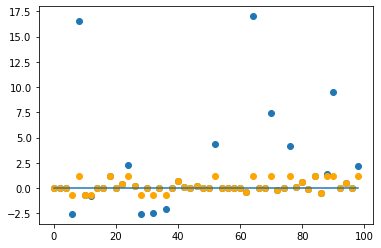

In [79]:
#Generate pseudo random points about line x axis
x = np.arange(0,100,2)
yRandom = np.random.normal(0,1, size=(len(x)))**3
plt.plot(x,np.zeros(len(x)))
plt.scatter(x,yRandom)
yWinsorized = winsorize(yRandom, limits=[0.1, 0.2])
plt.scatter(x,yWinsorized,color="orange")

b) Try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 

In [41]:
# Define the standard squared-loss function.
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

# Define a Winsor loss function
def winsor_loss(m, b, x, y, dy, c=2):
    yNomralized = (y - b) / m # model
    yWinsorized = winsorize(yNomralized, limits=[0.2, 0.2])
    loss = squared_loss(1, 0, x, yWinsorized, dy)
    return loss

# Define the log-likelihood via the Huber loss function
def huber_loss(m, b, x, y, dy, c=2):
    y_fit = m * x + b # model
    t = abs((y - y_fit) / dy) # define t
    mask = t > c # define mask for large excursion points
    
    # apply masking to different points
    # note '~' means 'not'
    return np.sum((~mask) * (0.5 * t ** 2) - (mask) * c * (0.5 * c - t), -1)

In [42]:
beta0 = (1, 30) # initial guess for a and b

# compute the maximum likelihood WITHOUT outliers
f_squared = lambda beta: squared_loss(beta[0], beta[1], x=x[4:], y=y[4:], dy=dy[4:])
beta_squared = optimize.fmin(f_squared, beta0)

# compute the maximum likelihood WITH outliers
f_squared_outlier = lambda beta: squared_loss(beta[0], beta[1], x=x, y=y, dy=dy)
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)

# compute the maximum likelihood using the huber loss
f_huber = lambda beta: huber_loss(beta[0], beta[1], x=x, y=y, dy=dy, c=1)
beta0 = (1, 30)
beta_huber = optimize.fmin(f_huber, beta0)

# compute the maximum likelihood with winsorizing
f_winsor = lambda beta: winsor_loss(beta[0], beta[1], x=x, y=y, dy=dy, c=1)
beta0 = (1, 30)
beta_winsor = optimize.fmin(f_winsor, beta0)

Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 43.439758
         Iterations: 62
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 124.268754
         Iterations: 58
         Function evaluations: 110


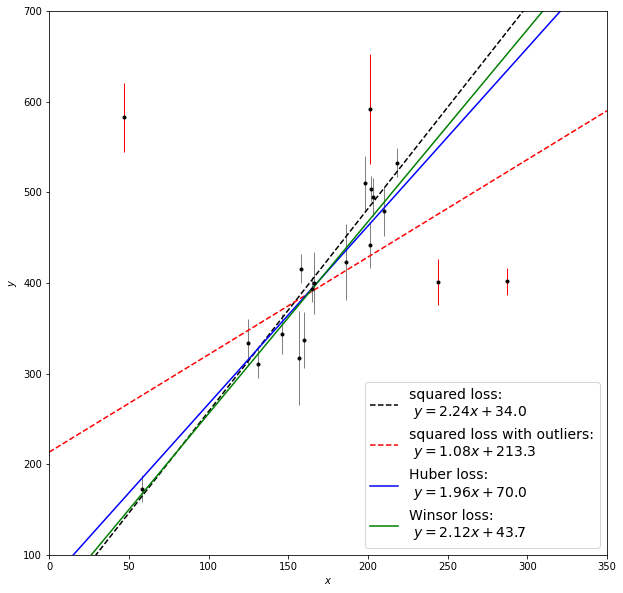

In [46]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')
# plot the outliers in red
ax.errorbar(x[:4], y[:4], dy[:4], 
            fmt='.k', lw=1, ecolor='red')

x_fit = np.linspace(0, 350, 10)
# plot the regular fit from before without outliers
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        ls='--', color='k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
# plot the fit that includes outliers
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1], 
        ls='--', color='red',
        label="squared loss with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))
# plot the fit with the huber likelihood, downweighting outliers
ax.plot(x_fit, beta_huber[0] * x_fit + beta_huber[1], 
        ls='-', color='blue',
        label="Huber loss:\n $y=%.2fx + %.1f$" % tuple(beta_huber))
# plot the fit with the winsor likelihood, capping outliers
ax.plot(x_fit, beta_winsor[0] * x_fit + beta_winsor[1], 
        ls='-', color='green',
        label="Winsor loss:\n $y=%.2fx + %.1f$" % tuple(beta_winsor))

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))

plt.show()